<a href="https://colab.research.google.com/github/RahulGundapaneni/Machine-Learning-From-Scratch/blob/main/Driver%20Fatigue%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#command line arguments to install follwing dependencies
!brew install cmake
!pip install dlib
!pip install face_recognition
!pip install playsound

/bin/bash: brew: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=009e430c29b480f012adf9633d28d37ec6277639b6614badeebdbd339047c448
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7019 sha256=1006c3958f239a11ef430ae01c7b3d579ae7b43aa0460fe8dd6d2682006403b3
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
#upload the archived closed data folder to google colab and unzip it.
!unzip  /content/lfw-a.zip -d /content/closed_eye


In [33]:
#upload the archived open data folder to google colab and unzip it.
!unzip  /content/open_eye.zip -d /content/open_eye_


Archive:  /content/open_eye.zip
   creating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0001.jpg_face_1.jpg  
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0002.jpg_face_2.jpg  
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0003.jpg_face_2.jpg  
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0007.jpg_face_1.jpg  
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0009.jpg_face_1.jpg  
  inflating: /content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution/closed_eye_0012.jpg_face_1.jpg  
  inflating: 

In [ ]:
from PIL import Image
import face_recognition
import os

def crop_open_eye(open_eye_dataset):
    # Declaring count variable to know the number of processed images.
    count = 0
    output_dir = "/content/preprocessed_open_eye/"

    # Create output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through all images in the directory.
    for img_file in os.listdir(open_eye_dataset):
        # Open the file using Image library.
        im = Image.open(open_eye_dataset + '/' + img_file)
        # Apply facial recognition to the image file.
        open_eye_face = face_recognition.load_image_file(open_eye_dataset + '/' + img_file)
        # Facial coordinates are stored in the list.
        face_cordinates = face_recognition.face_landmarks(open_eye_face)

        # Eyes will be recognized and stored in the below list.
        EYES = []
        try:
            EYES.append(face_cordinates[0]['left_eye'])
            EYES.append(face_cordinates[0]['right_eye'])
        except:
            continue

        for eye in EYES:
            max_x = max([coordinate[0] for coordinate in eye])
            min_x = min([coordinate[0] for coordinate in eye])
            max_y = max([coordinate[1] for coordinate in eye])
            min_y = min([coordinate[1] for coordinate in eye])
            xrange = -(min_x-max_x)
            yrange = -(min_y-max_y)

            if xrange > yrange:
                right_boundary = round(.5*xrange-5+5) + max_x
                left_boundary = min_x - round(.5*xrange-5+5)
                bottom_boundary = round(((right_boundary-left_boundary) - yrange-5+5))/2 + max_y
                top_boundary = min_y - round(((right_boundary-left_boundary) - yrange+8-8))/2
            else:
                bottom_boundary = round(.5*yrange) + max_y # Change range_of_y to yrange
                top_boundary = min_y - round(.5*yrange) # Change range_of_y to yrange
                right_boundary = round(((bottom_boundary-top_boundary) - xrange))/2 + max_x
                left_boundary = min_x - round(((bottom_boundary-top_boundary) - yrange))/2

            im = Image.open(open_eye_dataset + '/' + img_file)
            im = im.crop((left_boundary, top_boundary, right_boundary, bottom_boundary))
            im = im.resize((80,80))
            name = output_dir + str(count) + '.jpg'
            im.save(name, 'JPEG')
            count += 1

# Call the function with your dataset path
crop_open_eye("/content/open_eye_/dataset_B_FacialImages_highResolution/dataset_B_FacialImages_highResolution")


In [29]:
from PIL import Image, ImageDraw
import face_recognition
import os

def closed_function_to_crop_eyes(closed_eye):
    # Establish count for iterative file saving
    count = 0
    output_dir = "/content/preprocessed_closed_eye/"

    # Create output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # For loop going through each image file
    for person in os.listdir(closed_eye):
        for img_file in os.listdir(closed_eye + '/' + person):
            # Open the file using Image library.
            im=Image.open(closed_eye + '/' + person+'/'+img_file)
            # Apply facial recognition to the image file.
            closed_eye_face = face_recognition.load_image_file(closed_eye + '/' + person + '/' + img_file)
            # Facial coordinates are stored in the list.
            face_coordinates = face_recognition.face_landmarks(closed_eye_face)

            # Eyes will be recognized and stored in the below list.
            EYES = []
            try:
                EYES.append(face_coordinates[0]['left_eye'])
                EYES.append(face_coordinates[0]['right_eye'])
            except:
                continue

            # Maximum and Minimum are found for each eye.
            for eye in EYES:
                max_x = max([coordinate[0] for coordinate in eye])
                min_x = min([coordinate[0] for coordinate in eye])
                max_y = max([coordinate[1] for coordinate in eye])
                min_y = min([coordinate[1] for coordinate in eye])
                xrange = -(min_x-max_x)
                yrange = -(min_y-max_y)

                if xrange > yrange:
                    right_boundary = round(.5*xrange-5+5) + max_x
                    left_boundary = min_x - round(.5*xrange-5+5)
                    bottom_boundary = round(((right_boundary-left_boundary) - yrange-5+5))/2 + max_y
                    top_boundary = min_y - round(((right_boundary-left_boundary) - yrange+8-8))/2
                else:
                    bottom_boundary = round(.5*yrange) + max_y # changed range_of_y to yrange
                    top_boundary = min_y - round(.5*yrange) # changed range_of_y to yrange
                    right_boundary = round(((bottom_boundary-top_boundary) - xrange))/2 + max_x
                    left_boundary = min_x - round(((bottom_boundary-top_boundary) - yrange))/2

                im = Image.open(closed_eye + '/' + person + '/' + img_file)
                im = im.crop((left_boundary, top_boundary, right_boundary, bottom_boundary))
                im = im.resize((80,80))
                name = output_dir + str(count) + '.jpg'
                im.save(name, 'JPEG')
                count += 1
                # print count every 200 photos to monitor progress
                if count % 200 == 0:
                    print(count)

                if count >= 100:
                    break


In [31]:

closed_function_to_crop_eyes('closed_eye/lfw')

200
400
600
800
1000


# New Section

**Phase 3 **
1.Unzip the open eyes and closed eyes folder.

In [36]:
#!zip -r '/content/preprocessed_closed_eye.zip' 'preprocessed_closed_eye'
#!zip -r '/content/preprocessed_open_eye.zip' 'preprocessed_open_eye'

!unzip  '/content/preprocessed_closed_eye.zip' -d 'preprocessed_closed_eye'
!unzip  '/content/preprocessed_open_eye.zip' -d 'preprocessed_open_eye'



unzip:  cannot find or open /content/preprocessed_closed_eye.zip, /content/preprocessed_closed_eye.zip.zip or /content/preprocessed_closed_eye.zip.ZIP.
unzip:  cannot find or open /content/preprocessed_open_eye.zip, /content/preprocessed_open_eye.zip.zip or /content/preprocessed_open_eye.zip.ZIP.


**PHASE 3**

2. For each image in the folder convert them into equalivalent pixel level data which has a size of 80*80 .



In [37]:
!pip install opencv-python


In [40]:
import os
from PIL import Image, ImageDraw
import face_recognition
import os
import cv2 as c_v

def loading_images(folder, eyes = 0):

    images = []
    for filename in os.listdir(folder):
        try:
            img = c_v.imread(os.path.join(folder,filename))
            #image resizing
            img = c_v.resize(img, (80,80))
            images.append([img, eyes])
        except:
            continue


    return images

#Retreving images from eyes open dataset. and converting it into a list
open_eyes = loading_images("/content/preprocessed_closed_eye/", 0)
#Retreving images from eyes closed dataset. and converting it into a list
closed_eyes = loading_images("/content/preprocessed_open_eye/", 1)
eyes = closed_eyes + open_eyes

**Phase 3**


3.Spliting the whole data into X_train,X_test,y_train,y_test using treain_test_spilt with a ration of 70 /30

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

X = []
y = []
for features, label in eyes:
     X.append(features)
     y.append(label)
X = (np.array(X).reshape(-1, 80, 80, 3))/255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.3)


**Phase 4**


In [42]:
# Instantiate the model
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf




#plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential()
#first three convolutional layers
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu', # activation function
                input_shape = (80,80,3) # shape of input (image)
                ))
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))

# Adding pooling after convolutional layers
#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value
model.add(MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

# Adding second set of convolutional layers
#Conv2D layers are generally used for achieving high accuracy in image recognition tasks
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))
# Adding second set of convolutional layers
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu' # activation function
                ))

# Add last pooling layer.
model.add(MaxPooling2D(pool_size=(2,2)))
# get a copy of an given array collapsed into one dimension.
model.add(Flatten())

# Adding first dense layer with 256 nodes
model.add(Dense(256, activation='relu'))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# adding output layer
model.add(Dense(1, activation = 'sigmoid'))

# compiling the model
#binary_crossentropy: It can also be used to describe a predicted outcome compare to the true outcome
#adam: Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent
#AUC: The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[tf.keras.metrics.AUC(curve = 'PR')])




**Training the model with a batch size 500 and epochs = 30**

In [43]:
# fitting the model
history=model.fit(X_train,
            y_train,
            batch_size=500,
            validation_data=(X_test, y_test),
            epochs=30)

Epoch 1/30
5/5 [==============================] - 33s 2s/step - loss: 0.6490 - auc: 0.7119 - val_loss: 0.6030 - val_auc: 0.8824
Epoch 2/30
5/5 [==============================] - 1s 244ms/step - loss: 0.5953 - auc: 0.8356 - val_loss: 0.5561 - val_auc: 0.8821
Epoch 3/30
5/5 [==============================] - 1s 293ms/step - loss: 0.5560 - auc: 0.8606 - val_loss: 0.5522 - val_auc: 0.8935
Epoch 4/30
5/5 [==============================] - 1s 260ms/step - loss: 0.5332 - auc: 0.8783 - val_loss: 0.4805 - val_auc: 0.9405
Epoch 5/30
5/5 [==============================] - 1s 250ms/step - loss: 0.4671 - auc: 0.9348 - val_loss: 0.4398 - val_auc: 0.9581
Epoch 6/30
5/5 [==============================] - 1s 251ms/step - loss: 0.3856 - auc: 0.9568 - val_loss: 0.3124 - val_auc: 0.9681
Epoch 7/30
5/5 [==============================] - 1s 248ms/step - loss: 0.2937 - auc: 0.9700 - val_loss: 0.2666 - val_auc: 0.9704
Epoch 8/30
5/5 [==============================] - 1s 247ms/step - loss: 0.2581 - auc: 0.9760

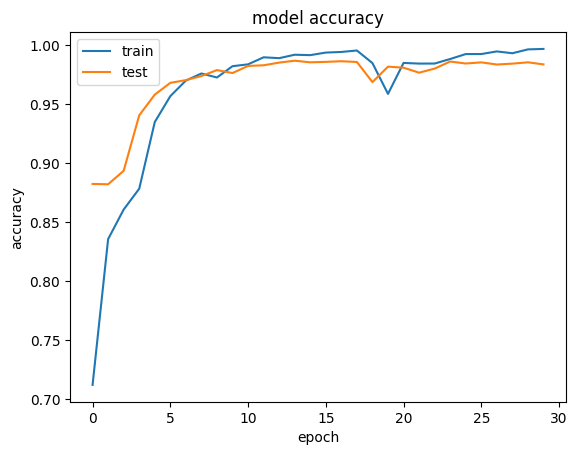

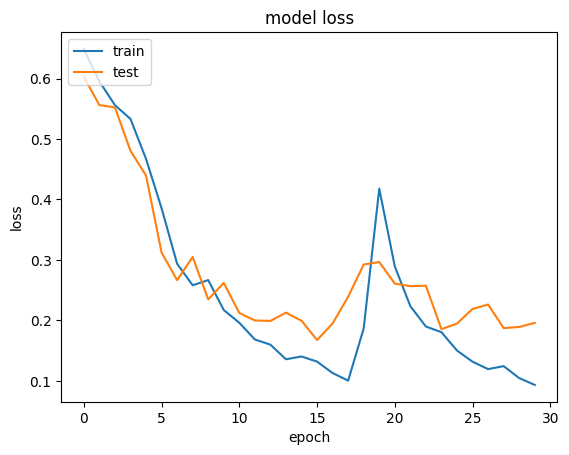

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

`**Validation AUC SCORE  = [0.9123 , 0.0431 ]**`

In [45]:

# evaluate the model
model.evaluate(X_test, y_test, verbose=1)

30/30 [==============================] - 1s 12ms/step - loss: 0.1959 - auc: 0.9837


[0.19586580991744995, 0.9837169051170349]

**Test AUC SCORE  = [0.8487206697463989 , 0.05003877729177475 ]**

**Final Phase**

In [46]:

import cv2
import numpy as np
from playsound import playsound
from PIL import Image, ImageDraw
import face_recognition
from tensorflow import keras
eye_model = keras.models.load_model('/content/cnnCat2.h5')

# webcam frame is inputted into function
def eye_cropper(frame):

    # create a variable for the facial feature coordinates
    facial_features_list = face_recognition.face_landmarks(frame)

    # create a placeholder list for the eye coordinates
    # and append coordinates for eyes to list unless eyes
    # weren't found by facial recognition
    try:
        eye = facial_features_list[0]['left_eye']
    except:
        try:
            eye = facial_features_list[0]['right_eye']
        except:
            return

    # establish the max x and y coordinates of the eye
    maximum_x = max([coordinate[0] for coordinate in eye])
    mininum_x = min([coordinate[0] for coordinate in eye])
    maximum_y = max([coordinate[1] for coordinate in eye])
    mininum_y = min([coordinate[1] for coordinate in eye])

    # establish the range of x and y coordinates
    range_of_x = maximum_x - mininum_x
    range_of_y = maximum_y - mininum_y

    # in order to make sure the full eye is captured,
    # calculate the coordinates of a square that has a
    # 50% cushion added to the axis with a larger range and
    # then match the smaller range to the cushioned larger range
    if range_of_x > range_of_y:
        right = round(.5*range_of_x) + maximum_x
        left = mininum_x - round(.5*range_of_x)
        bottom = round((((right-left) - range_of_y))/2) + maximum_y
        top = mininum_y - round((((right-left) - range_of_y))/2)
    else:
        bottom = round(.5*range_of_y) + maximum_y
        top = mininum_y - round(.5*range_of_y)
        right = round((((bottom-top) - range_of_x))/2) + maximum_x
        left = mininum_x - round((((bottom-top) - range_of_x))/2)

    # crop the image according to the coordinates determined above
    cropped = frame[top:(bottom + 1), left:(right + 1)]

    # resize the image
    cropped = cv2.resize(cropped, (80,80))
    predicted_image = cropped.reshape(-1, 80, 80, 3)

    return predicted_image

# initiate webcam
cap = cv2.VideoCapture(0)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
if not cap.isOpened():
    raise IOError('Cannot open webcam')

# set a counter
counter = 0

# create a while loop that runs while webcam is in use
while True:

    # capture frames being outputted by webcam
    ret, frame = cap.read()

    # use only every other frame to manage speed and memory usage
    count_of_frame = 0
    if count_of_frame == 0:
        count_of_frame += 1
        pass
    else:
        count = 0
        continue

    # function called on the frame
    predicted_image = eye_cropper(frame)
    try:
        predicted_image = predicted_image/255.0
    except:
        continue

    # get prediction from model
    prediction = eye_model.predict(predicted_image)

    # Based on prediction, display either "Open Eyes" or "Closed Eyes"
    if prediction < 0.5:
        counter = 0
        status = 'Open'

        cv2.rectangle(frame, (round(w/2) - 110,20), (round(w/2) + 110, 80), (38,38,38), -1)

        cv2.putText(frame, status, (round(w/2)-80,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 2, cv2.LINE_4)
        x1, y1,w1,h1 = 0,0,175,75
        ## Draw black backgroun rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1-20, y1+h1-20), (0,0,0), -1)
        ## Add text
        cv2.putText(frame, 'Active', (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)
    else:
        counter = counter + 1
        status = 'Closed'

        cv2.rectangle(frame, (round(w/2) - 110,20), (round(w/2) + 110, 80), (38,38,38), -1)

        cv2.putText(frame, status, (round(w/2)-104,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2, cv2.LINE_4)
        x1, y1,w1,h1 = 0,0,175,75
        ## Draw black backgroun rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1-20, y1+h1-20), (0,0,0), -1)
        ## Add text
        cv2.putText(frame, 'Active', (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)

        # if the counter is greater than 3, play and show alert that user is asleep
        if counter > 2:

            ## Draw black background rectangle
            cv2.rectangle(frame, (round(w/2) - 160, round(h) - 200), (round(w/2) + 160, round(h) - 120), (0,0,255), -1)
            cv2.putText(frame, 'DRIVER is not active', (round(w/2)-136,round(h) - 146), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_4)
            cv2.imshow('Drowsiness Detection', frame)
            k = cv2.waitKey(1)
            ## Sound
            playsound('rooster.mov')
            counter = 1
            continue

    cv2.imshow('Drowsiness Detection', frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
